In [94]:
import os 
import pandas as pd
import numpy as np

path = os.getcwd()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
path = 'C:\\Users\\sunil\\Projects\\Dockship\\segmind_grand_ai_challenge_2021-dataset'

In [16]:
train = pd.read_csv(path + "\\dataset\\TRAIN.csv")
test = pd.read_csv(path + "\\dataset\\TEST.csv")
ss = pd.read_csv(path + "\\dataset\\sample_submission.csv")
shop = pd.read_csv(path + "\\dataset\\store.csv")

C:\Users\sunil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['day'] = train['Date'].dt.day
train['dayofweek'] = train['Date'].dt.dayofweek
train['week'] = train['Date'].dt.week

test['year'] = test['Date'].dt.year
test['month'] = test['Date'].dt.month
test['day'] = test['Date'].dt.day
test['dayofweek'] = test['Date'].dt.dayofweek
test['week'] = test['Date'].dt.week

train['StateHoliday'].replace({0 : 0, '0':0, 'a':1, 'b':2, 'c':3}, inplace = True)
test['StateHoliday'].replace({0 : 0, '0':0, 'a':1, 'b':2, 'c':3}, inplace = True)

In [35]:
# Merging

store_type = dict(zip(shop['Store'], shop['StoreType']))
store_ass = dict(zip(shop['Store'], shop['Assortment']))
store_com = dict(zip(shop['Store'], shop['CompetitionDistance']))
store_month = dict(zip(shop['Store'], shop['CompetitionOpenSinceMonth']))
store_year = dict(zip(shop['Store'], shop['CompetitionOpenSinceYear']))
store_p2 = dict(zip(shop['Store'], shop['Promo2']))
store_pweek = dict(zip(shop['Store'], shop['Promo2SinceWeek']))
store_pyear = dict(zip(shop['Store'], shop['Promo2SinceYear']))
store_pi = dict(zip(shop['Store'], shop['PromoInterval']))

train['Store_Type'] = train['Store'].map(store_type)
train['Store_Assortment'] = train['Store'].map(store_ass)
train['Store_distance'] = train['Store'].map(store_com)
train['Store_month'] = train['Store'].map(store_month)
train['Store_year'] = train['Store'].map(store_year)
train['Store_p2'] = train['Store'].map(store_p2)
train['Store_pweek'] = train['Store'].map(store_pweek)
train['Store_pyear'] = train['Store'].map(store_pyear)
train['Store_pi'] = train['Store'].map(store_pi)


test['Store_Type'] = test['Store'].map(store_type)
test['Store_Assortment'] = test['Store'].map(store_ass)
test['Store_distance'] = test['Store'].map(store_com)
test['Store_month'] = test['Store'].map(store_month)
test['Store_year'] = test['Store'].map(store_year)
test['Store_p2'] = test['Store'].map(store_p2)
test['Store_pweek'] = test['Store'].map(store_pweek)
test['Store_pyear'] = test['Store'].map(store_pyear)
test['Store_pi'] = test['Store'].map(store_pi)


train['Store_Assortment'].unique()
train['Store_Assortment'].replace({'a':1, 'b':2, 'c':3}, inplace = True)
test['Store_Assortment'].replace({'a':1, 'b':2, 'c':3}, inplace = True)


a = [0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec']
b = [0, 1, 2, 3]

train['Store_pi'].replace(dict(zip(a, b)), inplace = True)
test['Store_pi'].replace(dict(zip(a, b)), inplace = True)

train['Store_Type'].replace({'a':1, 'b':2, 'c':3, 'd':4}, inplace = True)
test['Store_Type'].replace({'a':1, 'b':2, 'c':3, 'd':4}, inplace = True)

train.fillna(0, inplace = True)
test.fillna(0, inplace = True)

In [36]:
pd.set_option('display.max_columns', 100)

In [42]:
int8_cols = ['DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'month', 'day', 'dayofweek',
            'week', 'Store_Type', 'Store_Assortment','Store_month', 'Store_p2', 'Store_pweek','Store_pi']

int16_cols = ['Customers', 'year']

int32_cols = ['Sales', 'Store_distance', 'Store_year', 'Store_pyear']

In [43]:
def int8(x):
    train[x] = train[x].astype('int8')
    
    test[x] = train[x].astype('int8')

def int16(x):
    train[x] = train[x].astype('int16')
    if x != 'Customers':
        test[x] = train[x].astype('int16')

def int32(x):
    train[x] = train[x].astype('int32')
    
    test[x] = train[x].astype('int32')

In [44]:
for col in int8_cols:
    int8(col)

for col in int16_cols:
    int16(col)

for col in int32_cols:
    int32(col)

---
# Manual Filling
1. Open = 0

# Hypothesis Generation

1. Sales per store w.r.t. day, week, month, year.
2. Sales difference in Promo
3. Holiday --> More Sales
4. Sales w.r.t Month, day, year, week.
5. Sales w.r.t Store type
6. Popular Stores w.r.t holiday, week, month, year, storetype, etc.
7. Days, weeks,month  with most customers, promo. 
8. 

# EDA

In [85]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,712046.0,558.427662,321.965298,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,712046.0,3.999787,1.996273,1.0,2.0,4.0,6.0,7.0
Sales,712046.0,5872.082608,3918.569033,0.0,3795.0,5848.0,7991.0,41551.0
Customers,712046.0,637.975274,468.446468,0.0,410.0,614.0,843.0,5494.0
Open,712046.0,0.828574,0.376881,0.0,1.0,1.0,1.0,1.0
Promo,712046.0,0.380600,0.485535,0.0,0.0,0.0,1.0,1.0
StateHoliday,712046.0,0.050230,0.307868,0.0,0.0,0.0,0.0,3.0
SchoolHoliday,712046.0,0.172167,0.377526,0.0,0.0,0.0,0.0,1.0
year,712046.0,2014.188989,0.662752,2013.0,2014.0,2014.0,2015.0,2015.0
month,712046.0,6.196426,3.539482,1.0,3.0,6.0,10.0,12.0


In [91]:
# Unique values in each column

pd.DataFrame([train.nunique(), test.nunique()]).T

,0,1
Store,1115.0,1115.0
DayOfWeek,7.0,7.0
Date,669.0,274.0
Sales,20727.0,17921.0
Customers,3956.0,NaN
Open,2.0,2.0
Promo,2.0,2.0
StateHoliday,4.0,4.0
SchoolHoliday,2.0,2.0
year,3.0,2.0


In [92]:
test['year'].unique()

array([2015, 2014], dtype=int16)

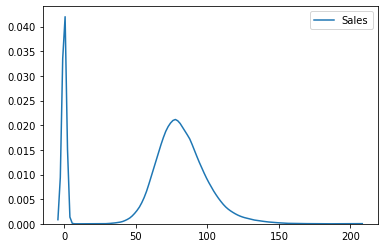

In [109]:
sns.kdeplot(np.sqrt(train['Sales']))

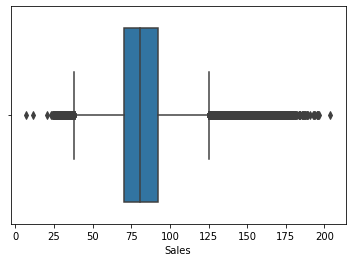

In [111]:
sns.boxplot(np.sqrt(train[train['Sales'] !=0]['Sales']))

---
# Univariate Analysis

In [138]:
cat_cols = ['DayOfWeek', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'year', 'month', 'day', 'dayofweek',
       'week', 'Store_Type', 'Store_Assortment',
       'Store_month', 'Store_year', 'Store_p2', 'Store_pweek', 'Store_pyear',
       'Store_pi']

num_cols = ['Customers', 'Store_distance']

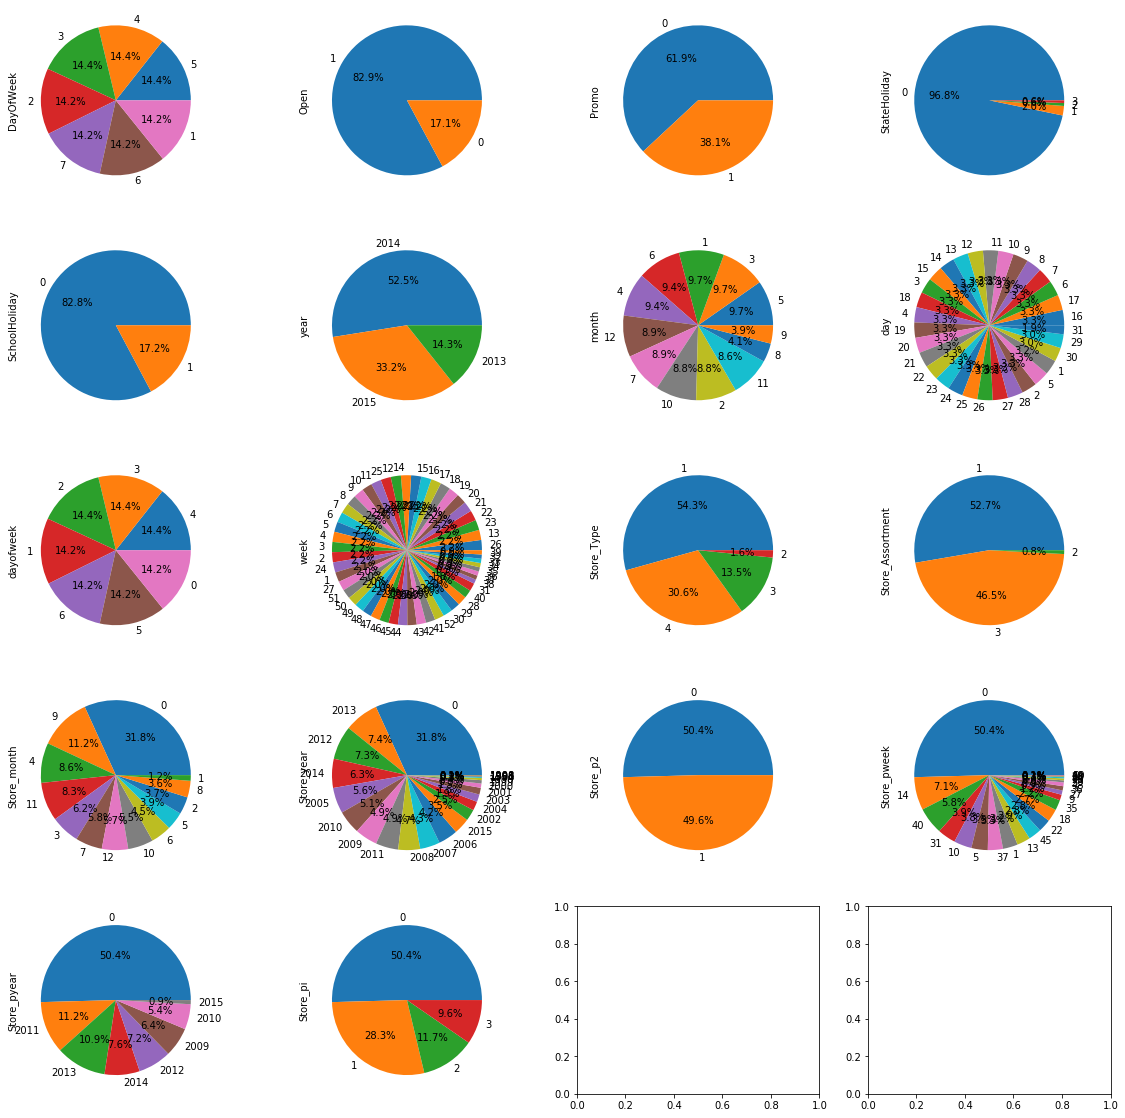

In [127]:
f, ax = plt.subplots(5, 4, figsize = (20, 20))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    train[col].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[index])

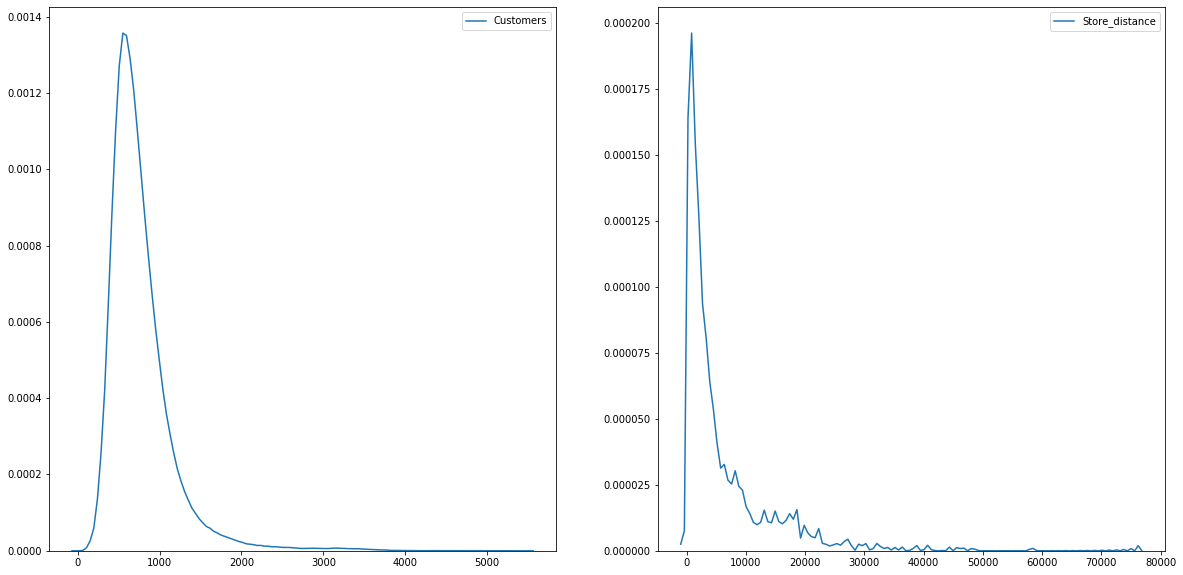

In [139]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.kdeplot(train[col], ax = axx[index])

# Bivariate Analysis

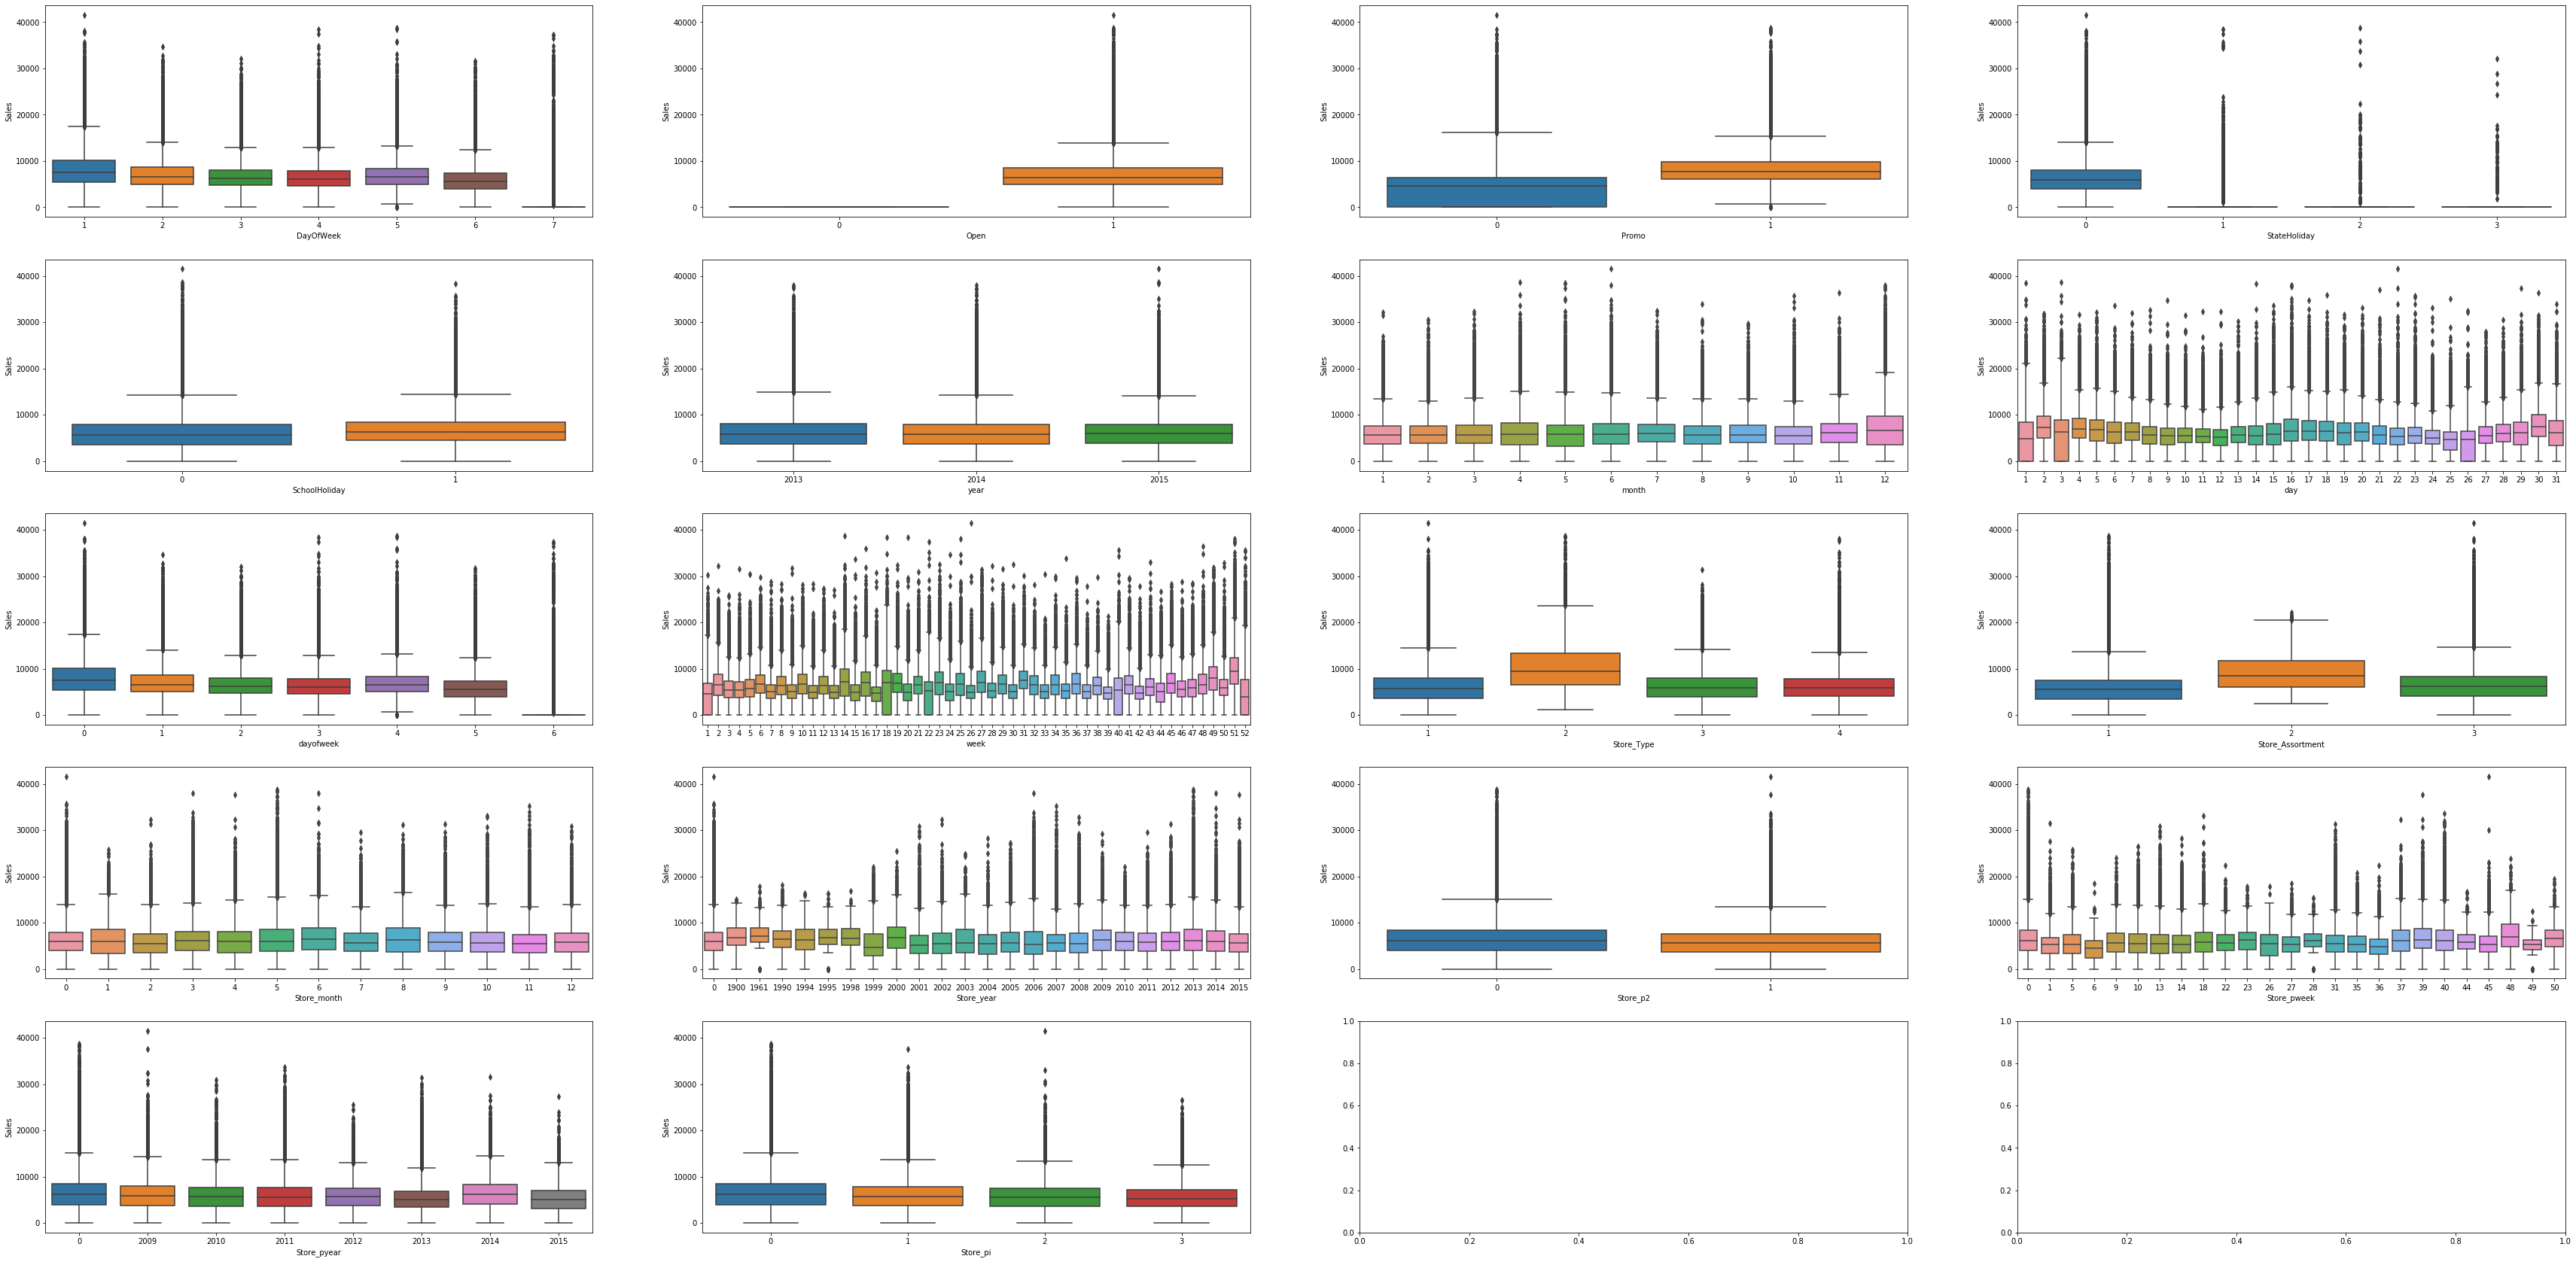

In [145]:
f, ax = plt.subplots(5, 4, figsize = (60, 30))
axx = ax.flatten()

for index, col in enumerate(cat_cols):
    sns.boxplot(y = train['Sales'], x=train[col], ax=axx[index])

1. Most of the shops are closed on day-7. 
2. promo 1 has higher sales.
3. Shops are mostly closed on StateHolidays.

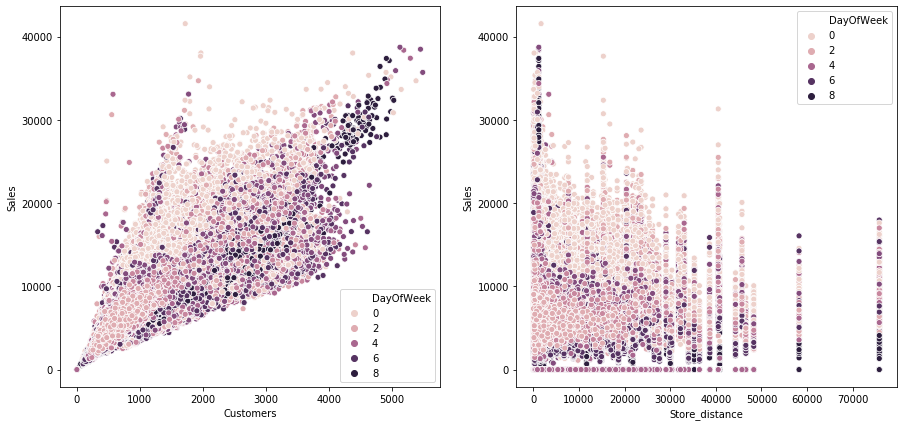

In [174]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
axx = ax.flatten()

for index, col in enumerate(num_cols):
    sns.scatterplot(y = train['Sales'], x=train[col], ax=axx[index], hue = train['DayOfWeek'])

1. Store distance is inversly proportional to sales

# Multivariate Analysis

In [160]:
mul_cols = ['DayOfWeek', 'month', 'year', 'week']

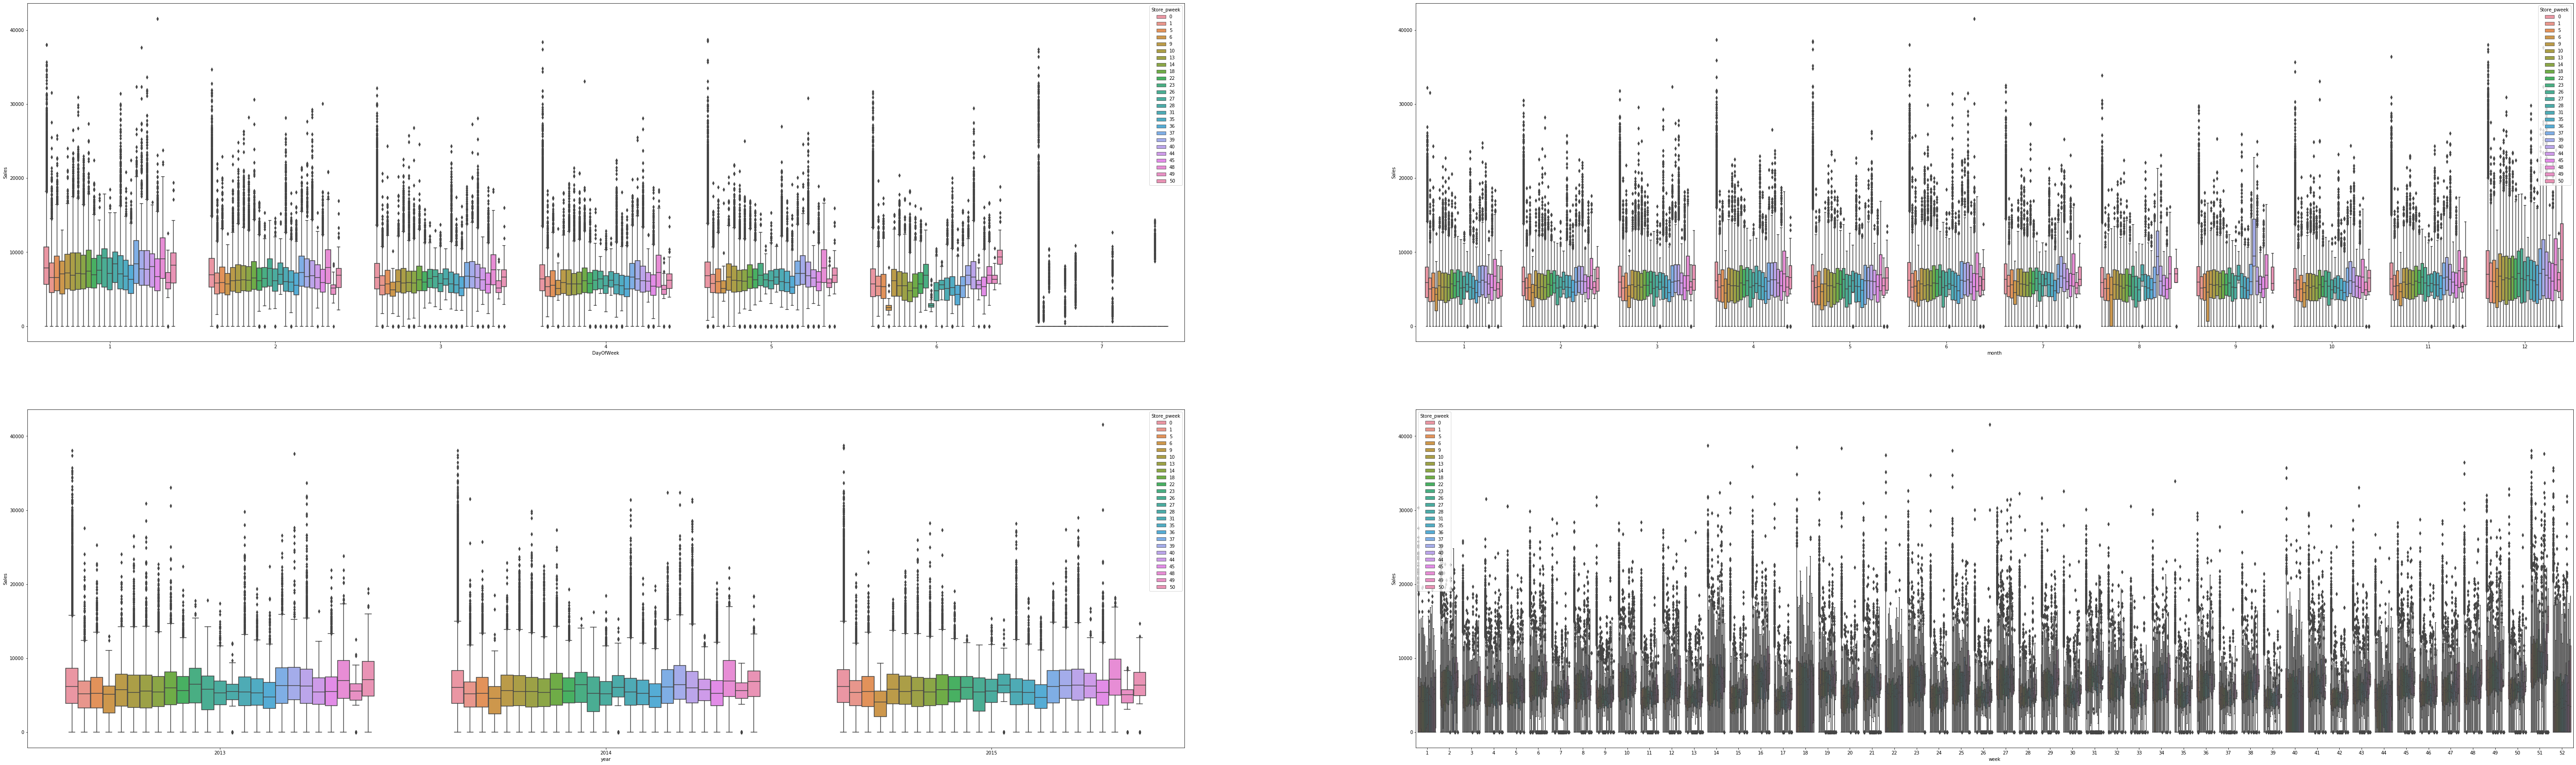

In [166]:
f, ax = plt.subplots(2, 2, figsize = (100, 30))
axx = ax.flatten()

for index, col in enumerate(mul_cols):
    sns.boxplot(y = train['Sales'], x=train[col],hue = train['Store_pweek'], ax=axx[index])

1. Sales are maximum on Day 1 and keeps decreasing till day 4, sales spikes a little on day 5 and decreases exponentially afterwards.

2. December has slightly higher sales.
3. Store Type 2 has higher sales.
4. Store Assortment 2 has higher Sales.
5. Promo 1 has higher Sales.

1. Sales per store w.r.t. day, week, month, year.
2. Sales difference in Promo
3. Holiday --> More Sales
4. Sales w.r.t Month, day, year, week.
5. Sales w.r.t Store type
6. Popular Stores w.r.t holiday, week, month, year, storetype, etc.
7. Days, weeks,month  with most customers, promo. 

In [177]:
# Popular Stores w.r.t holiday, week, month, year, storetype, etc.

train[ (train['StateHoliday'] != 0)]['DayOfWeek'].value_counts()

4    9288
5    5961
1    4769
3    2380
6     399
2     309
Name: DayOfWeek, dtype: int64

In [181]:
train[ (train['DayOfWeek'] == 7) & (train['Sales']!=0)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,dayofweek,week,Store_Type,Store_Assortment,Store_distance,Store_month,Store_year,Store_p2,Store_pweek,Store_pyear,Store_pi
5659,85,7,2015-07-26,11421,1606,1,0,0,0,2015,7,26,6,30,2,1,1870,10,2011,0,0,0,0
5696,122,7,2015-07-26,5773,707,1,0,0,0,2015,7,26,6,30,1,3,58260,4,2013,0,0,0,0
5783,209,7,2015-07-26,3742,354,1,0,0,0,2015,7,26,6,30,1,3,11680,9,2011,1,31,2013,1
5833,259,7,2015-07-26,15998,2857,1,0,0,0,2015,7,26,6,30,2,2,210,0,0,0,0,0,0
5836,262,7,2015-07-26,32547,4783,1,0,0,0,2015,7,26,6,30,2,1,1180,5,2013,0,0,0,0


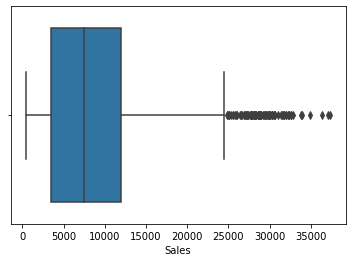

In [192]:
sns.boxplot(train[ (train['DayOfWeek'] == 7) & (train['Sales'] != 0)]['Sales'])

In [231]:
d = train.groupby('Store')['Customers'].median().sort_values(ascending=False).to_dict()
count = 0
for i, j in d.items():
    if j < 410:
        print(f"{i} : {train[train['Store'] == i]['Sales'].median()} : {5848.0 - train[train['Store'] == i]['Sales'].median()}")
        count+=1
count

752 : 4170.5 : 1677.5
103 : 4397.0 : 1451.0
867 : 4311.5 : 1536.5
485 : 4743.5 : 1104.5
521 : 4814.0 : 1034.0
1104 : 5075.0 : 773.0
194 : 4608.0 : 1240.0
219 : 3025.0 : 2823.0
326 : 4892.0 : 956.0
165 : 3611.0 : 2237.0
288 : 5072.0 : 776.0
970 : 3056.0 : 2792.0
858 : 4427.0 : 1421.0
568 : 4708.0 : 1140.0
41 : 5357.0 : 491.0
429 : 4897.5 : 950.5
420 : 4380.5 : 1467.5
286 : 4006.0 : 1842.0
607 : 3167.5 : 2680.5
540 : 5520.5 : 327.5
743 : 3355.5 : 2492.5
500 : 5418.0 : 430.0
841 : 2608.0 : 3240.0
48 : 3536.0 : 2312.0
612 : 6175.0 : -327.0
520 : 3546.5 : 2301.5
208 : 2774.0 : 3074.0
750 : 4726.0 : 1122.0
45 : 4968.0 : 880.0
231 : 4478.0 : 1370.0
675 : 3363.5 : 2484.5
1031 : 4131.5 : 1716.5
997 : 4459.5 : 1388.5
1103 : 4762.5 : 1085.5
762 : 3649.5 : 2198.5
669 : 4326.0 : 1522.0
347 : 4615.5 : 1232.5
649 : 3295.5 : 2552.5
495 : 4568.0 : 1280.0
1056 : 3879.5 : 1968.5
601 : 4571.5 : 1276.5
590 : 4792.0 : 1056.0
337 : 4788.0 : 1060.0
548 : 4314.5 : 1533.5
435 : 2978.0 : 2870.0
656 : 3041.5 : 28

79

In [233]:
d = train.groupby('Store')['Sales'].median().sort_values(ascending=False).to_dict()
count = 0
for i, j in d.items():
    if j < 3795.0:
        print(f"{i} : {train[train['Store'] == i]['Sales'].median()} : {3795.0 - train[train['Store'] == i]['Sales'].median()}")
        count+=1
count

274 : 3794.0 : 1.0
702 : 3780.5 : 14.5
276 : 3776.0 : 19.0
557 : 3769.5 : 25.5
958 : 3760.0 : 35.0
811 : 3759.0 : 36.0
751 : 3758.5 : 36.5
619 : 3743.5 : 51.5
570 : 3742.5 : 52.5
407 : 3722.0 : 73.0
395 : 3706.0 : 89.0
177 : 3704.0 : 91.0
1042 : 3689.0 : 106.0
946 : 3686.5 : 108.5
889 : 3665.0 : 130.0
873 : 3651.5 : 143.5
762 : 3649.5 : 145.5
263 : 3640.0 : 155.0
32 : 3615.0 : 180.0
165 : 3611.0 : 184.0
610 : 3609.0 : 186.0
977 : 3604.5 : 190.5
1013 : 3585.5 : 209.5
881 : 3574.5 : 220.5
538 : 3570.0 : 225.0
72 : 3566.0 : 229.0
332 : 3565.0 : 230.0
302 : 3559.0 : 236.0
844 : 3559.0 : 236.0
1049 : 3549.0 : 246.0
520 : 3546.5 : 248.5
405 : 3538.5 : 256.5
117 : 3536.0 : 259.0
48 : 3536.0 : 259.0
83 : 3528.0 : 267.0
764 : 3506.5 : 288.5
772 : 3499.5 : 295.5
379 : 3482.5 : 312.5
186 : 3478.0 : 317.0
931 : 3432.0 : 363.0
837 : 3425.0 : 370.0
879 : 3419.5 : 375.5
908 : 3394.0 : 401.0
1076 : 3381.5 : 413.5
573 : 3380.5 : 414.5
675 : 3363.5 : 431.5
642 : 3357.0 : 438.0
488 : 3356.5 : 438.5
743 :

81

In [228]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,712046.0,558.427662,321.965298,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,712046.0,3.999787,1.996273,1.0,2.0,4.0,6.0,7.0
Sales,712046.0,5872.082608,3918.569033,0.0,3795.0,5848.0,7991.0,41551.0
Customers,712046.0,637.975274,468.446468,0.0,410.0,614.0,843.0,5494.0
Open,712046.0,0.828574,0.376881,0.0,1.0,1.0,1.0,1.0
Promo,712046.0,0.380600,0.485535,0.0,0.0,0.0,1.0,1.0
StateHoliday,712046.0,0.050230,0.307868,0.0,0.0,0.0,0.0,3.0
SchoolHoliday,712046.0,0.172167,0.377526,0.0,0.0,0.0,0.0,1.0
year,712046.0,2014.188989,0.662752,2013.0,2014.0,2014.0,2015.0,2015.0
month,712046.0,6.196426,3.539482,1.0,3.0,6.0,10.0,12.0


In [235]:
stores_sale = train.groupby('Store')['Sales'].median()
count = 0
for i, j in stores_sale.items():
    diff = 5848.0 - j
    if diff > 1800:
        print(i)
        count+=1

32
39
48
50
72
78
83
86
117
165
177
186
198
208
210
219
232
242
254
263
266
274
276
282
286
302
307
315
330
332
379
395
405
407
425
435
460
473
486
488
520
538
543
557
558
570
573
583
594
607
610
619
622
642
649
656
675
681
688
700
702
703
743
751
762
764
772
777
786
789
793
794
795
811
837
841
844
861
864
873
879
881
889
897
908
931
946
956
958
969
970
972
977
994
998
1013
1028
1030
1042
1049
1056
1063
1065
1076
1077
1110


In [240]:
# Stores w.r.t Week

train.groupby('week')['Customers'].sum().sort_values(ascending=False)

week
51    12844948.0
49    11168736.0
19    10965939.0
23    10810758.0
10    10784074.0
14    10773350.0
6     10700966.0
16    10628224.0
21    10485855.0
27    10467373.0
12    10413679.0
25    10380067.0
2     10262256.0
8     10257771.0
45    10158218.0
18    10049570.0
48    10037851.0
41     9902638.0
29     9716585.0
5      9687387.0
3      9521422.0
50     9514858.0
43     9429758.0
4      9369393.0
7      9295118.0
47     9246502.0
9      9243523.0
31     9132714.0
46     9059947.0
11     9049621.0
13     9031892.0
26     8979451.0
20     8809546.0
15     8743017.0
24     8742225.0
28     8656797.0
22     8490665.0
17     8355794.0
42     8350052.0
30     8299168.0
44     8261369.0
1      7700917.0
52     7391819.0
40     7097760.0
36     4683122.0
34     4572603.0
32     4497314.0
38     4469270.0
35     4067592.0
37     3963544.0
33     3926878.0
39     3817846.0
Name: Customers, dtype: float64

In [241]:
train.groupby('week')['Sales'].median().sort_values(ascending=False)

week
51    9530.0
49    7943.0
31    7532.5
14    7216.5
27    7109.0
23    7076.0
18    7016.0
16    7004.5
19    6906.5
45    6898.0
36    6761.0
25    6759.5
10    6751.0
6     6699.0
29    6664.5
48    6573.0
2     6568.0
41    6566.0
34    6550.0
21    6523.0
32    6504.0
12    6424.5
8     6364.0
38    6318.0
43    6013.5
50    5952.0
47    5834.0
5     5717.5
46    5554.5
3     5469.0
40    5456.0
4     5416.5
28    5259.0
22    5238.0
35    5172.0
24    5153.5
44    5055.5
30    5049.0
33    5047.0
7     5043.5
9     5041.0
37    5040.0
20    5004.0
13    5003.0
15    4994.5
26    4975.5
11    4966.0
42    4797.0
39    4748.0
17    4695.5
1     4589.5
52    3885.0
Name: Sales, dtype: float64

In [242]:
# Stores w.r.t month

train.groupby('month')['Customers'].sum().sort_values(ascending=False)

month
12    44679965.0
3     43296374.0
4     42399644.0
6     42225041.0
1     42003668.0
5     41699598.0
7     41553186.0
11    40230100.0
10    39542095.0
2     39453671.0
9     18667949.0
8     18516451.0
Name: Customers, dtype: float64

In [255]:
# Store's Sales/Customers w.r.t StoreType

train.groupby('Store_Type')['Customers'].sum().sort_values(ascending=False)

Store_Type
1    255635316.0
4    110527524.0
3     65210817.0
2     22894085.0
Name: Customers, dtype: float64

In [262]:
# Store's Sales/Customers w.r.t StoreType

(train.groupby(['month', 'Store_Type'])['Sales'].sum().sort_values(ascending=False))/1000

month  Store_Type
12     1             233264.321
3      1             213043.033
6      1             212374.363
4      1             209585.390
7      1             208472.575
1      1             205755.088
5      1             203488.248
11     1             200194.343
2      1             190860.254
10     1             189105.888
12     4             127047.514
3      4             123071.750
6      4             122756.998
4      4             120770.653
1      4             119749.056
5      4             118807.477
7      4             114741.418
2      4             109753.624
11     4             107640.929
10     4             100883.409
9      1              90902.359
8      1              90128.701
12     3              61720.268
7      3              52138.542
3      3              51770.004
4      3              51201.903
6      3              51175.859
11     3              51152.784
1      3              50881.110
5      3              50115.076
10     3              